In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import xgboost as xgb
import pandas as pd

In [2]:
label_encoder = LabelEncoder()

df = pd.read_csv('Processed Data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 92 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rowid               9564 non-null   int64  
 1   koi_disposition     9564 non-null   object 
 2   koi_score           9564 non-null   float64
 3   koi_fpflag_nt       9564 non-null   int64  
 4   koi_fpflag_ss       9564 non-null   int64  
 5   koi_fpflag_co       9564 non-null   int64  
 6   koi_fpflag_ec       9564 non-null   int64  
 7   koi_period          9564 non-null   float64
 8   koi_time0bk         9564 non-null   float64
 9   koi_time0           9564 non-null   float64
 10  koi_impact          9564 non-null   float64
 11  koi_impact_err1     9564 non-null   float64
 12  koi_impact_err2     9564 non-null   float64
 13  koi_duration        9564 non-null   float64
 14  koi_duration_err1   9564 non-null   float64
 15  koi_duration_err2   9564 non-null   float64
 16  koi_de

In [3]:
df['koi_disposition_encoded'] = label_encoder.fit_transform(df['koi_disposition'])

print("Original classes:", df['koi_disposition'].unique())
print("Encoded classes:", df['koi_disposition_encoded'].unique())
print("Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Original classes: ['CONFIRMED' 'CANDIDATE' 'FALSE POSITIVE']
Encoded classes: [1 0 2]
Mapping: {'CANDIDATE': np.int64(0), 'CONFIRMED': np.int64(1), 'FALSE POSITIVE': np.int64(2)}


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['koi_disposition', 'koi_disposition_encoded'], axis=1), 
    df['koi_disposition_encoded'], 
    test_size=0.2, 
    random_state=42
)
clf = xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=2,device='cpu')

clf.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)]
)

[0]	validation_0-mlogloss:0.78257
[1]	validation_0-mlogloss:0.59709
[2]	validation_0-mlogloss:0.47595
[3]	validation_0-mlogloss:0.39486
[4]	validation_0-mlogloss:0.33342
[5]	validation_0-mlogloss:0.29016
[6]	validation_0-mlogloss:0.25791
[7]	validation_0-mlogloss:0.23447
[8]	validation_0-mlogloss:0.21606
[9]	validation_0-mlogloss:0.20241
[10]	validation_0-mlogloss:0.19157
[11]	validation_0-mlogloss:0.18349
[12]	validation_0-mlogloss:0.17781
[13]	validation_0-mlogloss:0.17376
[14]	validation_0-mlogloss:0.16946
[15]	validation_0-mlogloss:0.16732
[16]	validation_0-mlogloss:0.16456
[17]	validation_0-mlogloss:0.16118
[18]	validation_0-mlogloss:0.15966
[19]	validation_0-mlogloss:0.15986
[20]	validation_0-mlogloss:0.15877
[21]	validation_0-mlogloss:0.15685
[22]	validation_0-mlogloss:0.15605
[23]	validation_0-mlogloss:0.15555
[24]	validation_0-mlogloss:0.15514
[25]	validation_0-mlogloss:0.15596
[26]	validation_0-mlogloss:0.15639


,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,'cpu'
,early_stopping_rounds,2
,enable_categorical,False
,eval_metric,None


In [5]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Convert numeric predictions back to original labels for better interpretability
y_pred_labels = label_encoder.inverse_transform(y_pred.astype(int))
y_test_labels = label_encoder.inverse_transform(y_test.astype(int))


Accuracy: 0.9462

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       405
           1       0.91      0.93      0.92       569
           2       0.99      0.99      0.99       939

    accuracy                           0.95      1913
   macro avg       0.93      0.93      0.93      1913
weighted avg       0.95      0.95      0.95      1913


Confusion Matrix:
[[349  52   4]
 [ 38 530   1]
 [  7   1 931]]


In [7]:
import xgboost as xgb
# ...

clf = xgb.XGBClassifier(
    tree_method="hist", 
    early_stopping_rounds=2,
    # 🔥 'cpu' parametresi burada olmalı
    device='cpu' 
)

clf.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)]
    
)

[0]	validation_0-mlogloss:0.78257
[1]	validation_0-mlogloss:0.59709
[2]	validation_0-mlogloss:0.47595
[3]	validation_0-mlogloss:0.39486
[4]	validation_0-mlogloss:0.33342
[5]	validation_0-mlogloss:0.29016
[6]	validation_0-mlogloss:0.25791
[7]	validation_0-mlogloss:0.23447
[8]	validation_0-mlogloss:0.21606
[9]	validation_0-mlogloss:0.20241
[10]	validation_0-mlogloss:0.19157
[11]	validation_0-mlogloss:0.18349
[12]	validation_0-mlogloss:0.17781
[13]	validation_0-mlogloss:0.17376
[14]	validation_0-mlogloss:0.16946
[15]	validation_0-mlogloss:0.16732
[16]	validation_0-mlogloss:0.16456
[17]	validation_0-mlogloss:0.16118
[18]	validation_0-mlogloss:0.15966
[19]	validation_0-mlogloss:0.15986
[20]	validation_0-mlogloss:0.15877
[21]	validation_0-mlogloss:0.15685
[22]	validation_0-mlogloss:0.15605
[23]	validation_0-mlogloss:0.15555
[24]	validation_0-mlogloss:0.15514
[25]	validation_0-mlogloss:0.15596


,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,'cpu'
,early_stopping_rounds,2
,enable_categorical,False
,eval_metric,None


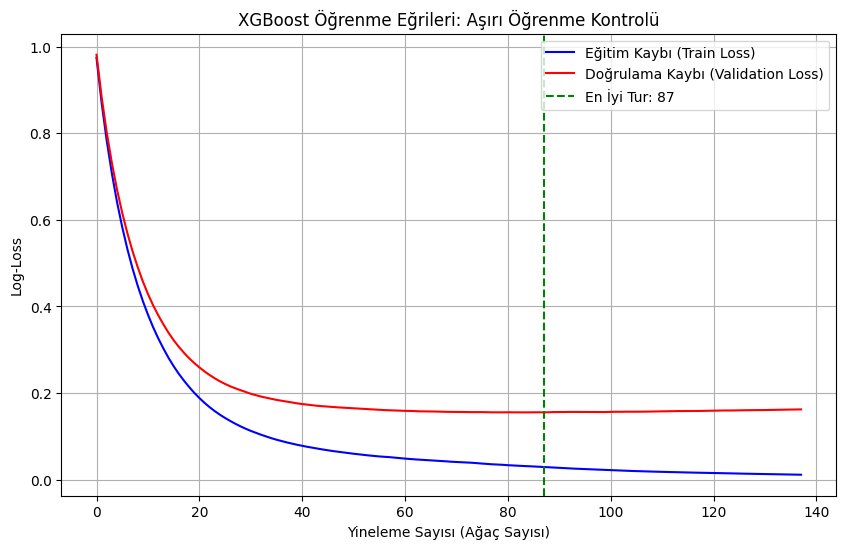


Model 88. turda durduruldu.
--------------------------------------------------
Eğitim Seti Log-Loss (En İyi Tur): 0.0291
Doğrulama Seti Log-Loss (En İyi Tur): 0.1551
--------------------------------------------------
!!! UYARI: Aşırı Öğrenme Eğilimi Var.
Doğrulama Kaybı, Eğitim Kaybından yüksektir.


In [7]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

# --- 1. ÖRNEK VERİ OLUŞTURMA (Gerçek verinizle değiştirin) ---
from sklearn.datasets import make_classification

# Eğitim ve Test/Doğrulama setlerine ayırma
df = pd .read_csv('Processed Data.csv')
label_encoder = LabelEncoder()
df['koi_disposition_encoded'] = label_encoder.fit_transform(df['koi_disposition'])

X_train, X_val, y_train, y_val = train_test_split(
    df.drop(['koi_disposition', 'koi_disposition_encoded'], axis=1), 
    df['koi_disposition_encoded'], 
    test_size=0.2, 
    random_state=42
)
# --- 2. XGBOOST MODELİNİ KURMA VE EĞİTME ---

# Model parametreleri
params = {
    'objective':'multi:softprob',  # for multi-class classification
    'num_class':3,                 # number of classes
    'eval_metric':'mlogloss',      # multi-class log loss
    'max_depth':7,
    'learning_rate':0.1,
    'seed':42
}

# Veri setlerini XGBoost'un DMatrix formatına dönüştürme
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# İzlenecek setleri tanımlama
evals = [(dtrain, 'train'), (dval, 'validation')]
num_round = 500

# !!! HATA DÜZELTME: evals_result sözlüğünü burada tanımlıyoruz !!!
evals_result = {}

# Modeli eğitme ve performans geçmişini kaydetme
model = xgb.train(
    params,
    dtrain,
    num_round,
    evals=evals,
    # 'evals_result' parametresi, metrik sonuçlarını bu sözlüğe kaydeder.
    evals_result=evals_result,
    early_stopping_rounds=50, 
    verbose_eval=False
)


# --- 3. ÖĞRENME EĞRİLERİNİ GÖRSELLEŞTİRME ---

# Kaydedilen metrikleri alıyoruz
train_loss = evals_result['train']['mlogloss']
val_loss = evals_result['validation']['mlogloss']
iterations = range(len(train_loss))

plt.figure(figsize=(10, 6))
plt.plot(iterations, train_loss, label='Eğitim Kaybı (Train Loss)', color='blue')
plt.plot(iterations, val_loss, label='Doğrulama Kaybı (Validation Loss)', color='red')
plt.axvline(x=model.best_iteration, color='green', linestyle='--', 
            label=f'En İyi Tur: {model.best_iteration}')

plt.title('XGBoost Öğrenme Eğrileri: Aşırı Öğrenme Kontrolü')
plt.xlabel('Yineleme Sayısı (Ağaç Sayısı)')
plt.ylabel('Log-Loss')
plt.legend()
plt.grid(True)
plt.show()


# --- 4. SONUÇ YORUMLAMA ---

print(f"\nModel {model.best_iteration + 1}. turda durduruldu.")
print("-" * 50)
# 'best_iteration' değeri, modelin durduğu indekstir.
best_idx = model.best_iteration
print(f"Eğitim Seti Log-Loss (En İyi Tur): {train_loss[best_idx]:.4f}")
print(f"Doğrulama Seti Log-Loss (En İyi Tur): {val_loss[best_idx]:.4f}")
print("-" * 50)

# Aşırı öğrenme kontrolü
if train_loss[best_idx] < val_loss[best_idx]:
    print("\033[91m!!! UYARI: Aşırı Öğrenme Eğilimi Var.\033[0m")
    print("Doğrulama Kaybı, Eğitim Kaybından yüksektir.")
else:
    print("\033[92m-> Model iyi genelleme yapıyor veya Erken Durdurma başarılı oldu.\033[0m")